# Data Preprocessing

In [66]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [67]:
# Read Dataset
data = pd.read_csv('1A.tsv', sep='\t')
data.head()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


In [68]:
# Show data dimension
data.shape

(418, 18)

In [69]:
# Show data columns
data.columns

Index(['ID', 'Registration Date', 'Drug', 'Birth Date', 'Gender', 'Ascites',
       'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [70]:
# Show data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Registration Date          418 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 418 non-null    object 
 4   Gender                     418 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      418 non-null    object 
 8   Bilirubin                  418 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    418 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64

In [71]:
# Data description
data.describe()

,ID,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,80.000000,418.000000,310.000000,312.000000,312.000000,418.000000,407.000000,416.000000
mean,209.500000,3.220813,358.662500,3.497440,97.648387,1982.655769,122.556346,83.803828,257.024570,10.731731
std,120.810458,4.407506,230.414099,0.424972,85.613920,2140.388824,56.699525,79.603693,98.325585,1.022000
min,1.000000,0.300000,149.000000,1.960000,4.000000,289.000000,26.350000,-1.000000,62.000000,9.000000
25%,105.250000,0.800000,236.000000,3.242500,41.250000,871.500000,80.600000,-1.000000,188.500000,10.000000
50%,209.500000,1.400000,284.500000,3.530000,73.000000,1259.000000,114.700000,85.000000,251.000000,10.600000
75%,313.750000,3.400000,409.500000,3.770000,123.000000,1980.000000,151.900000,127.750000,318.000000,11.100000
max,418.000000,28.000000,1480.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


In [72]:
# Show the total of unique values for each column
data.nunique()

ID                           418
Registration Date            399
Drug                           5
Birth Date                   344
Gender                         2
Ascites                        2
Hepatomegaly                   2
Edema                          3
Bilirubin                     98
Cholesterol                   69
Albumin                      154
Copper                       158
Alkaline Phospatase (U/L)    295
SGOT                         179
Tryglicerides                147
Platelets                    243
Prothrombin                   48
Stage                          4
dtype: int64

## Drop Identifier

In [73]:
# Delete identifier
data.drop(columns=["ID", "Registration Date"], inplace=True)

## Handle Missing Values

In [74]:
# Show the total of missing value for each column
data.isna().sum()

Drug                         106
Birth Date                     0
Gender                         0
Ascites                      106
Hepatomegaly                 106
Edema                          0
Bilirubin                      0
Cholesterol                  338
Albumin                        0
Copper                       108
Alkaline Phospatase (U/L)    106
SGOT                         106
Tryglicerides                  0
Platelets                     11
Prothrombin                    2
Stage                          6
dtype: int64

In [75]:
# Drop the "cholesterol" column due to a high number of missing values.
data = data.drop(columns=["Cholesterol"])

# Handle missing values in several columns by deleting rows
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306 entries, 0 to 311
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Drug                       306 non-null    object 
 1   Birth Date                 306 non-null    object 
 2   Gender                     306 non-null    object 
 3   Ascites                    306 non-null    object 
 4   Hepatomegaly               306 non-null    object 
 5   Edema                      306 non-null    object 
 6   Bilirubin                  306 non-null    float64
 7   Albumin                    306 non-null    float64
 8   Copper                     306 non-null    float64
 9   Alkaline Phospatase (U/L)  306 non-null    float64
 10  SGOT                       306 non-null    float64
 11  Tryglicerides              306 non-null    float64
 12  Platelets                  306 non-null    float64
 13  Prothrombin                306 non-null    float64
 14 

Based on the data info, all missing values have been properly handled, resulting in a total of 306 rows after the missing value treatment

## Handling duplicated data

In [76]:
# Show the total of duplicated data
data.duplicated().sum()

0

## Add Age Column

In [77]:
from datetime import datetime

# Convert 'Birth Date' column to datetime format
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

# Function to calculate age
def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Apply the function to create a new 'age' column
data['Age'] = data['Birth Date'].apply(calculate_age)

# Drop 'Birth Date' column
data.drop(columns=['Birth Date'], inplace=True)

This code aims to convert the date of birth into age information in the 'Age' column, making it easier to process and analyze during data processing

## Handling Anomalies

In [78]:
# Drug Column
data['Drug'] = data['Drug'].str.lower().replace({
    'd-penicillamine': 'd-penicillamine',
    'lacebo': 'placebo'
})

drug_counts = data['Drug'].value_counts()
print(drug_counts)

Drug
d-penicillamine    155
placebo            151
Name: count, dtype: int64


This code aims to merge values in the 'Drug' column that should be the same but are written differently, such as capitalization differences or spelling errors

In [79]:
# Stage Column
data['Stage'] = data['Stage'].str.replace(r'[_]', ' ', regex=True)
data['Stage'] = data['Stage'].str.strip()
data['Stage'] = data['Stage'].str.replace(r'\s+', ' ', regex=True)
data['Stage'] = data['Stage'].str.title()
data['Stage'] = data['Stage'].str.replace(r'Stage\s*(\d+)', r'Stage \1', regex=True)

# Count occurrences of each stage
stage_counts = data['Stage'].value_counts()
print(stage_counts)

Stage
Stage 3    118
Stage 4    108
Stage 2     65
Stage 1     15
Name: count, dtype: int64


This code aims to clean and standardize the data format in the 'Stage' column to make it neater and more consistent

# EDA

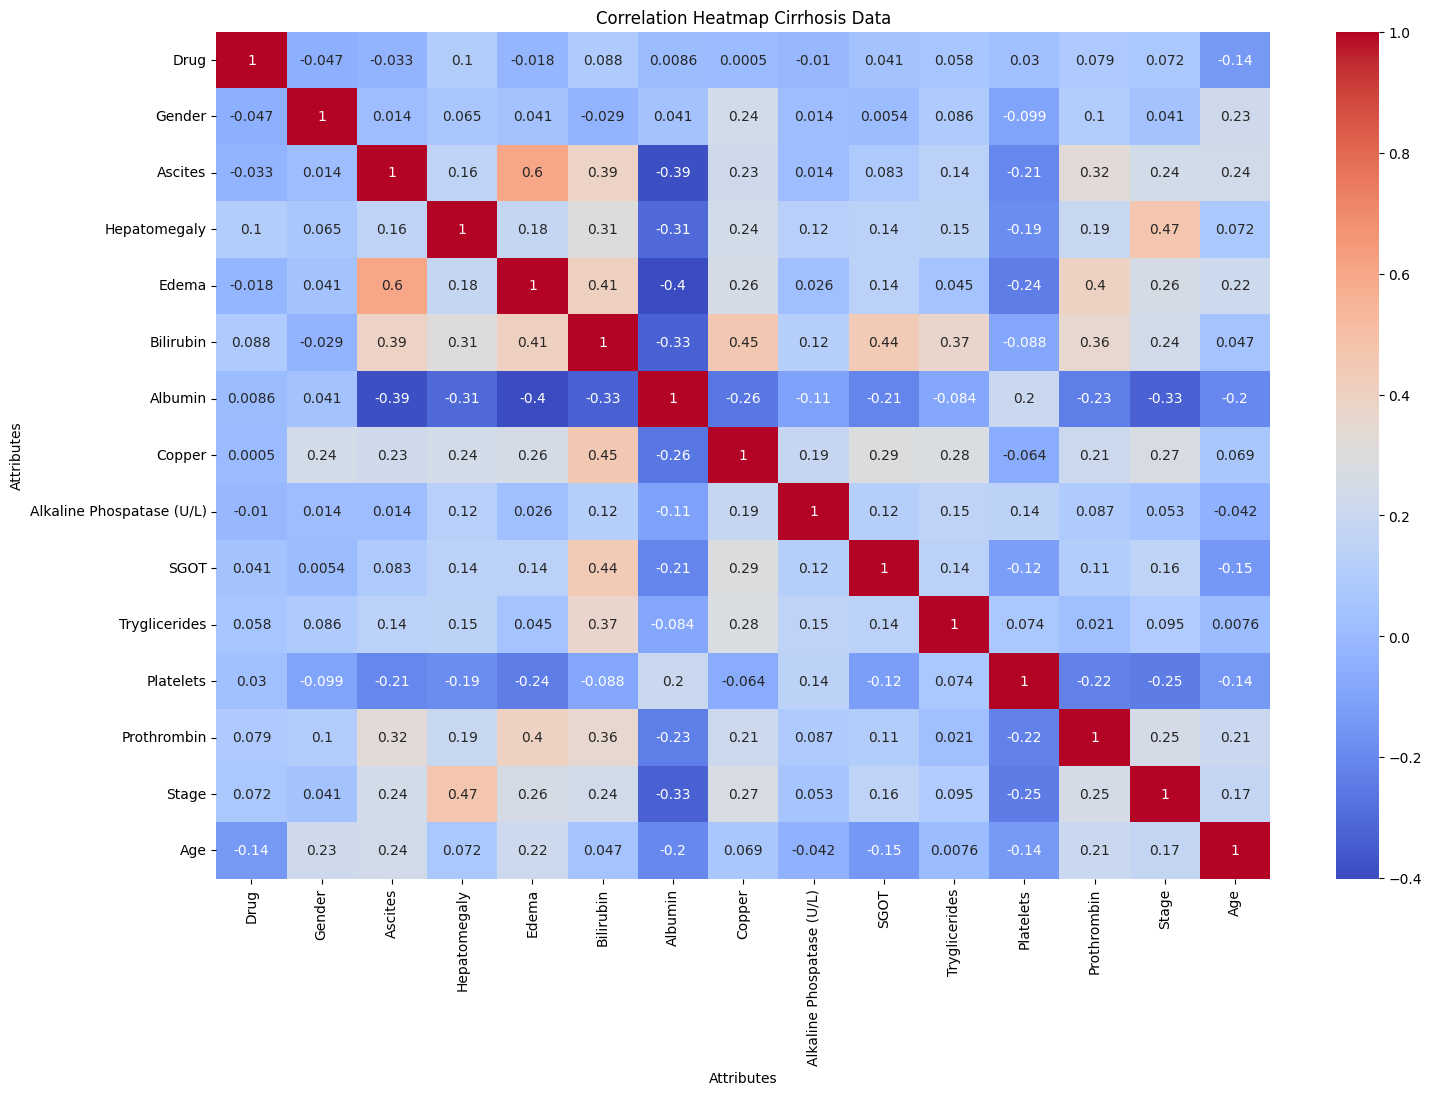

In [80]:
# Heatmap

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Copy Dataset
df = data.copy()
bin_enc = LabelEncoder()

# Encoding
for col in df.select_dtypes(include=['object']).columns:
    df[col] = bin_enc.fit_transform(df[col].astype(str))

correlation_matrix_all = df.corr()

# Plotting
plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Cirrhosis Data")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

This correlation heatmap shows the relationships between variables in the "Cirrhosis Data" dataset, with the color scale reflecting the strength of the relationship: dark red for strong positive correlation, dark blue for strong negative correlation, and white for weak or no correlation. Overall, several notable relationships emerge, such as the positive correlation between 'Stage' and 'Hepatomegaly' (0.47), suggesting that higher disease stages are often associated with liver enlargement. Additionally, there is a moderate positive correlation between 'Bilirubin' and 'Edema' (0.41), indicating that higher bilirubin levels are linked to the presence of edema. A positive correlation is also observed between 'Prothrombin' and 'Age' (0.25), suggesting that a patient's age may influence prothrombin levels. Meanwhile, a weak negative relationship can be seen, such as between 'Albumin' and 'Stage' (-0.33), indicating that albumin levels tend to decrease as the disease stage advances

In [81]:
# Divide the numerical and categorical columns
cat_cols = []
num_cols = []

for i in data.columns:
    if 'int' in str(data[i].dtype) or 'float' in str(data[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Edema', 'Stage']
Numeric: ['Bilirubin', 'Albumin', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


## Numerical Column Distribution

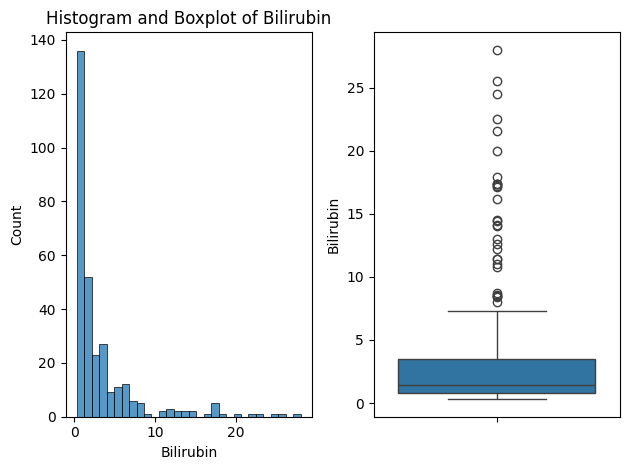

Skewness:  2.817540214492091
Kurtosis:  8.680667490516994


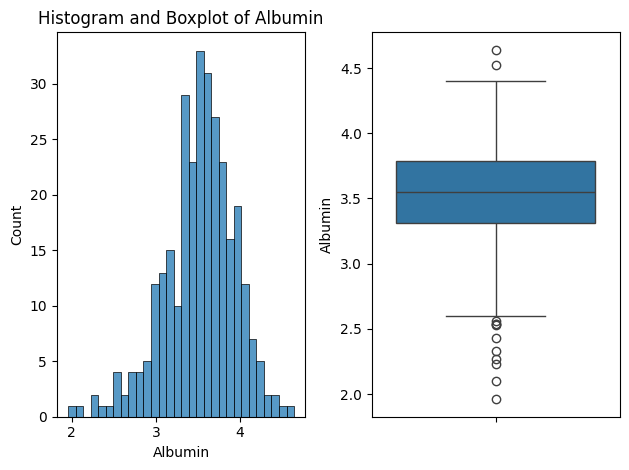

Skewness:  -0.5782674450898165
Kurtosis:  0.9638761384912069


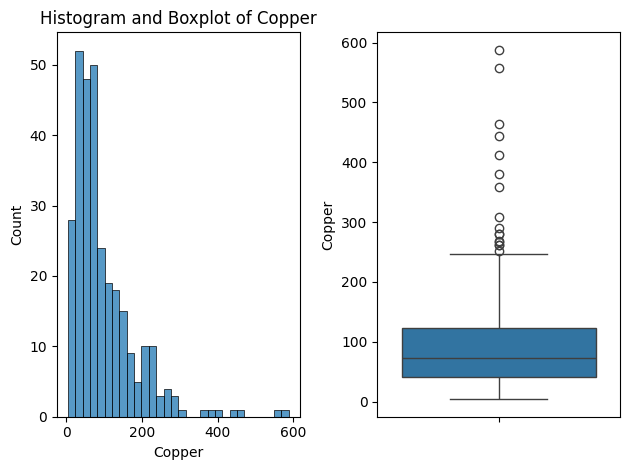

Skewness:  2.2856431823652814
Kurtosis:  7.515563507128517


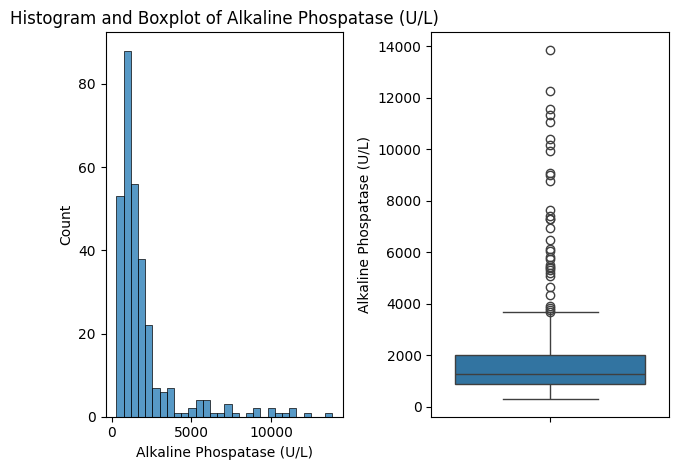

Skewness:  3.005139813159215
Kurtosis:  9.723126571888724


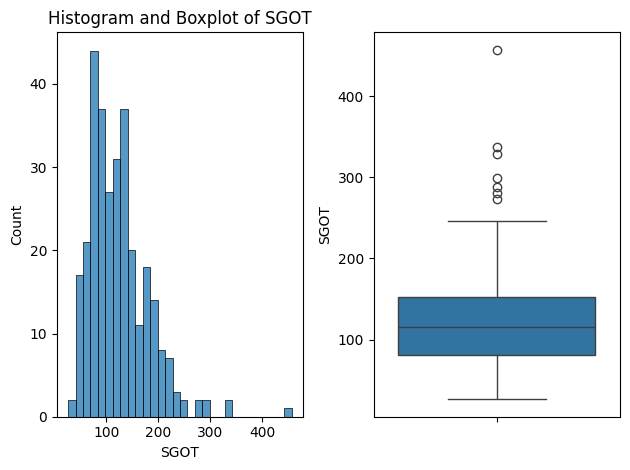

Skewness:  1.4474186250483927
Kurtosis:  4.289812936450611


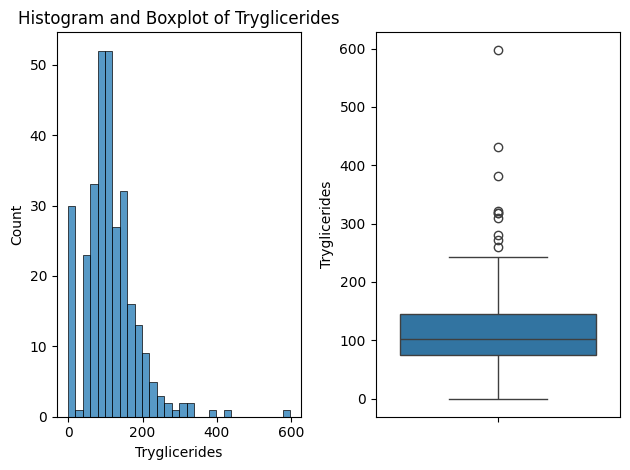

Skewness:  1.673768524651463
Kurtosis:  7.7356324734000665


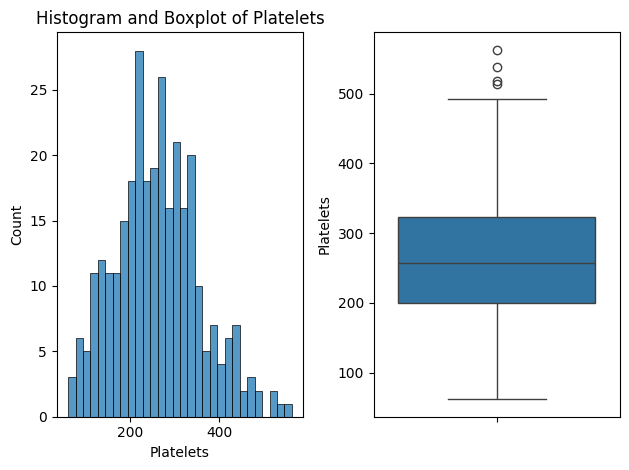

Skewness:  0.3734854844035126
Kurtosis:  -0.005941626677032907


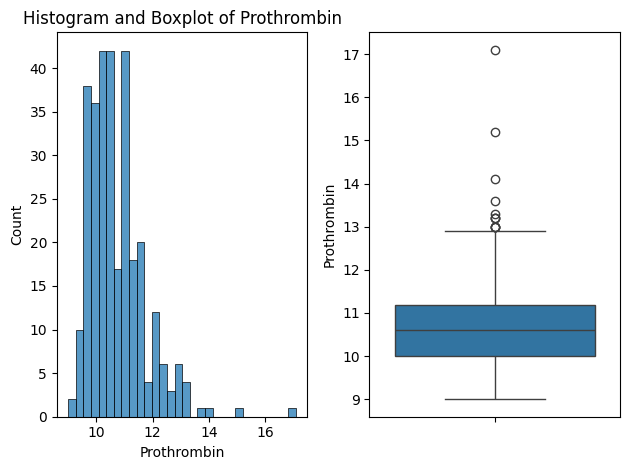

Skewness:  1.7392944630320002
Kurtosis:  6.018483343031384


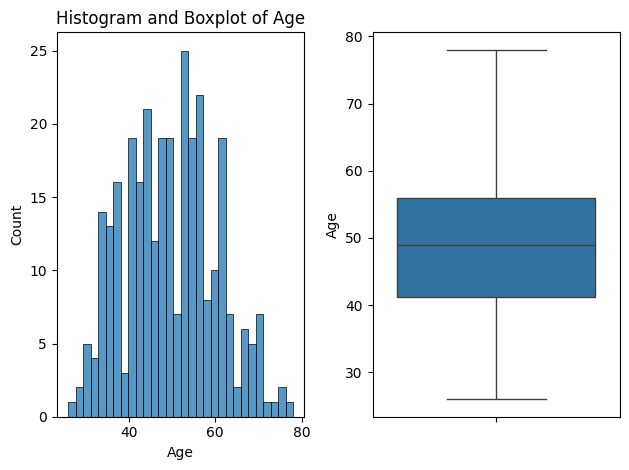

Skewness:  0.1744082615846146
Kurtosis:  -0.5159317765592006


In [82]:
# Plotting
for i in num_cols:
  plt.subplot(1,2,1)
  sns.histplot(data[i], bins = 30)
  plt.title(f"Histogram and Boxplot of {i}")

  plt.subplot(1,2,2)
  sns.boxplot(data[i])
  plt.tight_layout()
  plt.show()

  print("Skewness: ", data[i].skew())
  print("Kurtosis: ", data[i].kurt())

The histogram and boxplot displayed provide an overview of the distribution of various data attributes. Most attributes, such as Bilirubin, Copper, Alkaline Phosphatase, SGOT, and Triglycerides, show a right-skewed (positively skewed) distribution, characterized by a wide range of values and the presence of outliers at higher values. Albumin, Platelets, and Age have distributions closer to normal, with a few outliers in their boxplots. Prothrombin also shows a fairly centered distribution, but with the presence of some outliers. The significant outliers observed in several attributes, such as Alkaline Phosphatase and SGOT, suggest the need for special attention in data analysis

Skewness values indicate the degree of skewness or asymmetry in the data distribution. If skewness is between -0.5 and 0.5, the distribution is considered nearly symmetric. Positive skewness (>0) indicates a right skew (positively skewed), where the tail of the distribution is longer on the right side, while negative skewness (<0) indicates a left skew (negatively skewed), where the tail is longer on the left side. Distributions with skewness between -1 and -0.5 or 0.5 and 1 are considered mildly skewed, while skewness below -1 or above 1 indicates a highly skewed distribution that may require data transformation for further analysis

Kurtosis values help understand the shape of the data distribution, particularly in measuring the peak height and tail thickness. Kurtosis indicates the extent to which a distribution has a sharp or flat peak compared to a normal distribution. If the kurtosis value is close to 3, the distribution is called mesokurtic, similar to the normal distribution, with a moderate peak and tails of standard thickness. Conversely, if the kurtosis value is less than 3, the distribution is called platykurtic, with a flatter peak and thinner tails, indicating that the data tends to be more evenly spread

## Categorical Column Distribution

In [83]:
for col in cat_cols:
  print(data[col].value_counts())
  print("\n")

Drug
d-penicillamine    155
placebo            151
Name: count, dtype: int64


Gender
F    271
M     35
Name: count, dtype: int64


Ascites
N    283
Y     23
Name: count, dtype: int64


Hepatomegaly
Y    156
N    150
Name: count, dtype: int64


Edema
N    258
S     28
Y     20
Name: count, dtype: int64


Stage
Stage 3    118
Stage 4    108
Stage 2     65
Stage 1     15
Name: count, dtype: int64




The data distribution for categorical columns reveals interesting patterns across various attributes. In the **Drug** column, the number of patients receiving d-penicillamine (155) is slightly higher than those receiving placebo (151), indicating an almost balanced distribution. In the **Gender** column, there is a significant imbalance, with the majority of patients being female (271), while male patients are only 35

The **Ascites** column shows that most patients do not have ascites (283), while only a few have it (23). In contrast, the **Hepatomegaly** column has a more balanced distribution, with slightly more patients having hepatomegaly (156) than those without it (150)

For the **Edema** column, the majority of patients do not have edema (258), while a small number have mild edema (28) or severe edema (20). In the **Stage** column, most patients are in the advanced stages, with Stage 3 (118) and Stage 4 (108) being more prevalent, while Stage 2 (65) and Stage 1 (15) have fewer patients, reflecting the dominance of patients with more severe conditions in this dataset

## Bivariate

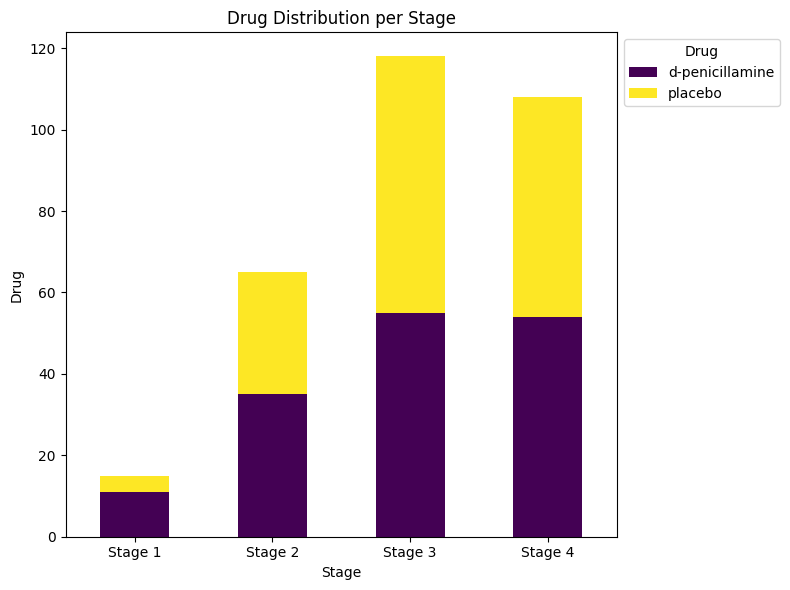

In [84]:
# Drug and Stage
pivot_table = data.pivot_table(index='Stage', columns='Drug', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")

plt.xlabel('Stage')
plt.ylabel('Drug')
plt.title('Drug Distribution per Stage')
plt.xticks(rotation=0)
plt.legend(title="Drug", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The distribution of Drug by Stage shows different patterns across each stage. In Stage 1, there are slightly more patients receiving placebo than those receiving d-penicillamine. In Stage 2, the proportion of patients receiving both drugs is almost balanced, with a slight advantage for placebo. For Stage 3, the number of patients increases significantly, with more patients receiving placebo than d-penicillamine. A similar pattern is observed in Stage 4, where placebo still dominates, though the difference is less pronounced. Overall, placebo tends to be given more across all disease stages, especially in the advanced stages, Stage 3 and Stage 4

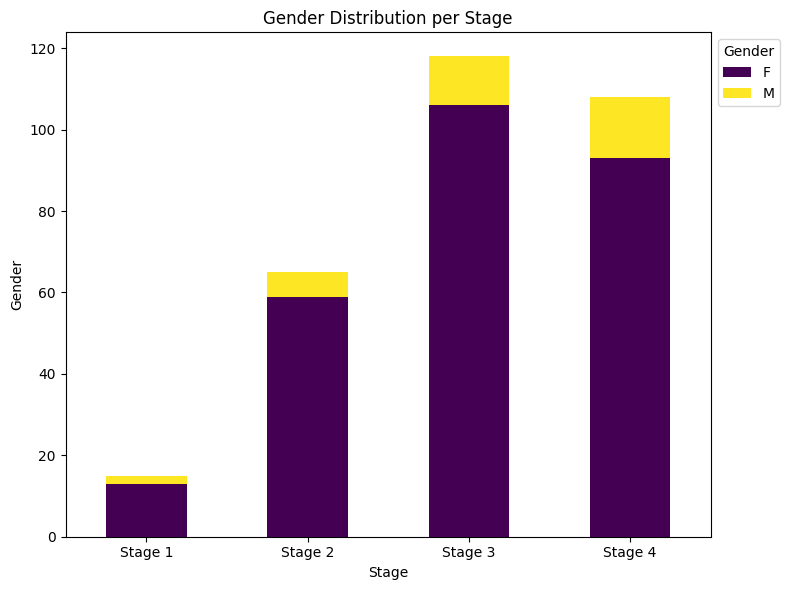

In [85]:
# Gender and Stage
pivot_table = data.pivot_table(index='Stage', columns='Gender', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")

plt.xlabel('Stage')
plt.ylabel('Gender')
plt.title('Gender Distribution per Stage')
plt.xticks(rotation=0)
plt.legend(title="Gender", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

This stacked bar chart shows the distribution of gender at each stage. The purple color represents the number of female individuals (F), while the yellow color represents the number of male individuals (M). From the chart, it can be seen that the number of participants increases from Stage 1 to Stage 3, with the highest number at Stage 3 before slightly decreasing at Stage 4. At every stage, the number of females is always higher than that of males, although the difference varies. Stage 3 has the highest number of both female and male participants compared to other stages, while Stage 1 has the lowest overall number of participants. The proportion of males is relatively small compared to females at all stages, but it slightly increases in Stage 4 compared to the previous stages. This indicates a dominance of females in the gender distribution of this data

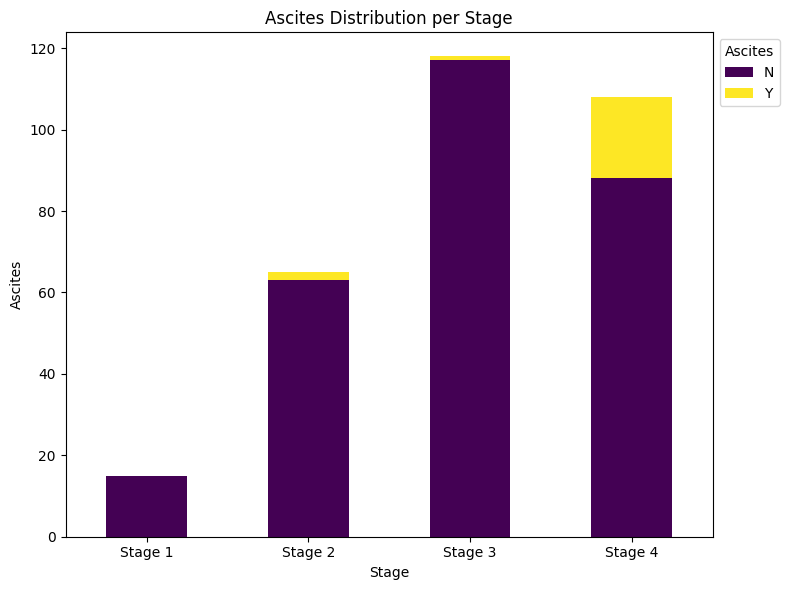

In [86]:
# Ascites and Stage
pivot_table = data.pivot_table(index='Stage', columns='Ascites', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")

plt.xlabel('Stage')
plt.ylabel('Ascites')
plt.title('Ascites Distribution per Stage')
plt.xticks(rotation=0)
plt.legend(title="Ascites", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

This stacked bar chart illustrates the distribution of ascites condition at each stage. The purple color (N) represents individuals without ascites, while the yellow color (Y) represents individuals with ascites. From the chart, it is evident that the majority of individuals at all stages do not have ascites. In Stage 1 and Stage 2, nearly all individuals do not have ascites, with only a few individuals starting to experience this condition. In Stage 3, the total number of individuals reaches its peak, but only a few have ascites. However, in Stage 4, the number of individuals with ascites increases more significantly compared to the previous stage, although the majority still fall into the category of no ascites. This indicates that ascites becomes more common in the later stages of the disease

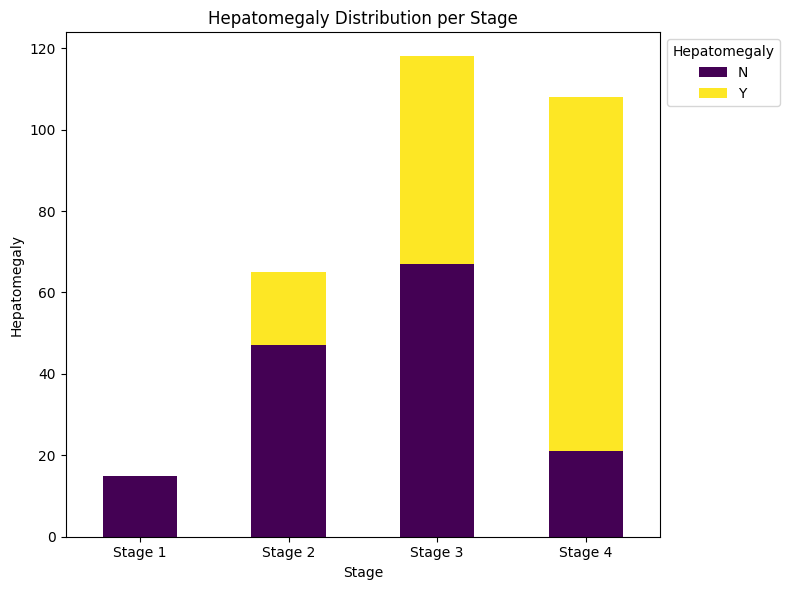

In [87]:
# Hepatomegaly and Stage
pivot_table = data.pivot_table(index='Stage', columns='Hepatomegaly', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")

plt.xlabel('Stage')
plt.ylabel('Hepatomegaly')
plt.title('Hepatomegaly Distribution per Stage')
plt.xticks(rotation=0)
plt.legend(title="Hepatomegaly", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

This chart shows the distribution of hepatomegaly condition at each stage. The purple color (N) represents individuals without hepatomegaly, while the yellow color (Y) represents individuals with this condition. In Stage 1, the majority of individuals do not have hepatomegaly, with only a few affected. In Stage 2, the total number of individuals increases, and the proportion with hepatomegaly also grows. Stage 3 shows the highest total number of individuals, with nearly half experiencing hepatomegaly, making it the stage with the most balanced distribution between individuals with and without this condition. However, in Stage 4, the number of individuals with hepatomegaly increases further, even surpassing those without the condition. This suggests that hepatomegaly becomes more common in the later stages of the disease, with a significant increase especially after Stage 2

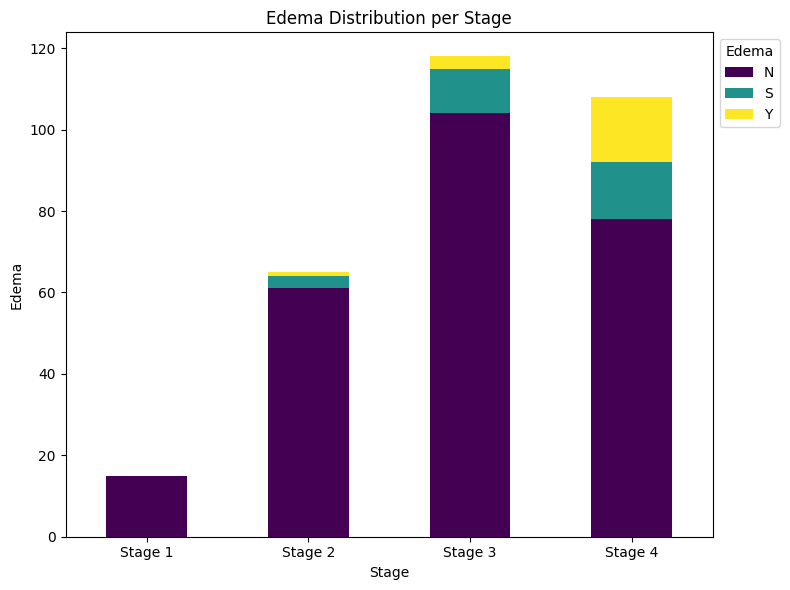

In [88]:
# Edema and Stage
pivot_table = data.pivot_table(index='Stage', columns='Edema', aggfunc='size', fill_value=0)
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")

plt.xlabel('Stage')
plt.ylabel('Edema')
plt.title('Edema Distribution per Stage')
plt.xticks(rotation=0)
plt.legend(title="Edema", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

This stacked bar chart shows the distribution of edema condition at each stage. The purple color (N) represents individuals without edema, the bluish-green color (S) represents individuals with mild edema, and the yellow color (Y) represents individuals with more severe edema. In Stage 1 and Stage 2, the majority of individuals do not have edema, with only a few cases of mild or severe edema. In Stage 3, the number of individuals increases significantly, with a small proportion experiencing mild edema and very few having severe edema. However, in Stage 4, the proportion of individuals with edema increases more compared to the previous stages, with more individuals experiencing severe edema than in Stage 3. This suggests that edema tends to develop as the severity of the disease increases

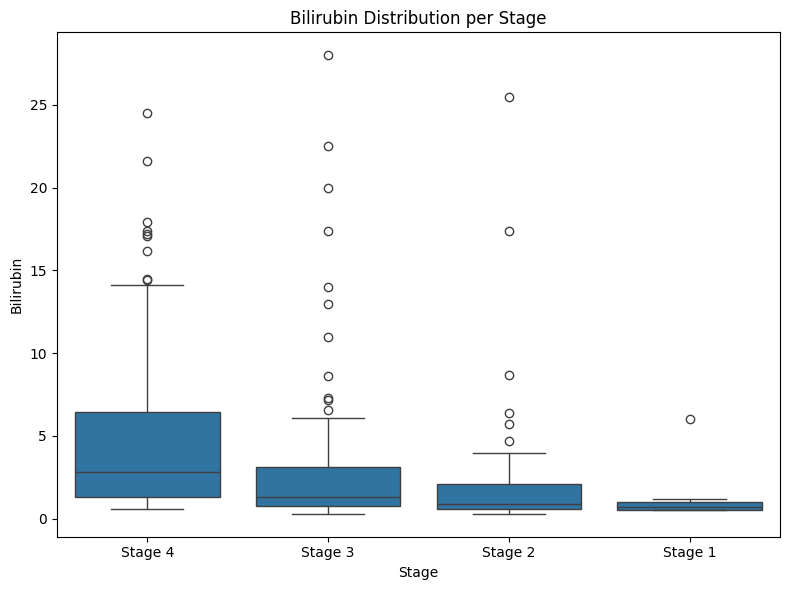

In [89]:
# Bilirubin and Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='Bilirubin', data=data)

plt.xlabel('Stage')
plt.ylabel('Bilirubin')
plt.title('Bilirubin Distribution per Stage')

plt.tight_layout()
plt.show()

This box plot illustrates the distribution of bilirubin levels in the blood at each stage. From the chart, it is clear that the median bilirubin level increases as the disease stage progresses. Stage 1 has the lowest bilirubin levels with little variation, while Stage 2 and Stage 3 show higher bilirubin levels with more outliers. In Stage 4, the bilirubin distribution becomes wider, with some individuals having very high bilirubin levels, indicating that the disease at advanced stages is more often associated with a significant increase in bilirubin levels. Overall, this chart shows that as the disease stage advances, bilirubin levels in the blood tend to be higher and more variable

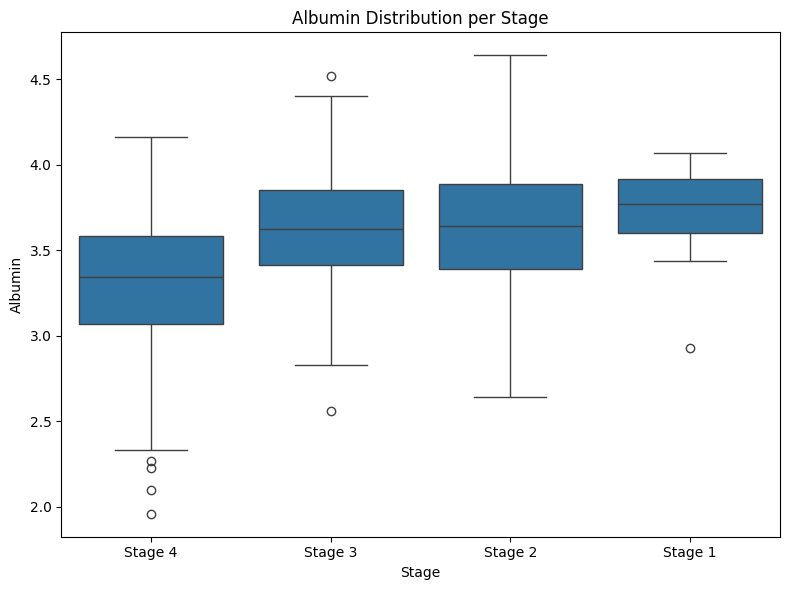

In [90]:
# Albumin and Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='Albumin', data=data)

plt.xlabel('Stage')
plt.ylabel('Albumin')
plt.title('Albumin Distribution per Stage')

plt.tight_layout()
plt.show()

This box plot shows the distribution of albumin levels at each stage. Generally, albumin levels appear to decrease as the disease stage progresses. Stage 1 has the highest median albumin levels compared to the other stages, while Stage 4 shows a lower median with a larger interquartile range (IQR) and several outliers, indicating individuals with very low albumin levels

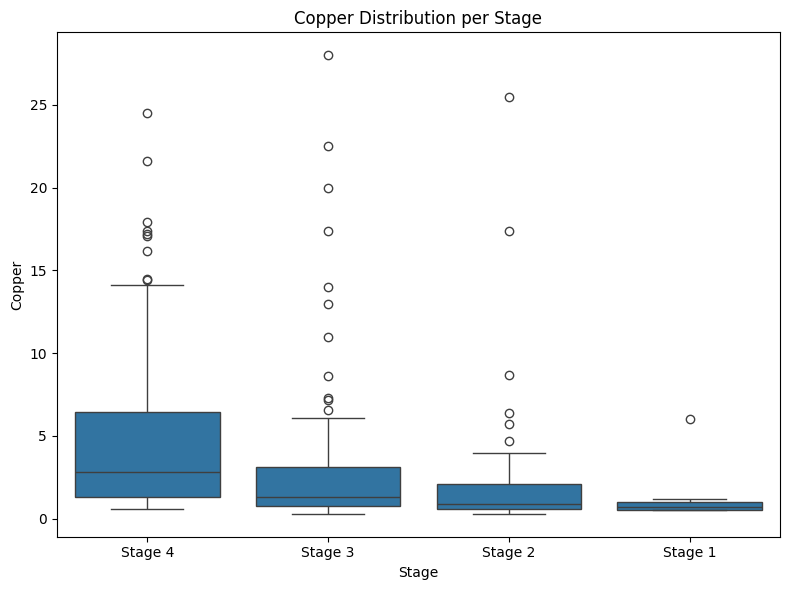

In [91]:
# Copper and Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='Bilirubin', data=data)

plt.xlabel('Stage')
plt.ylabel('Copper')
plt.title('Copper Distribution per Stage')

plt.tight_layout()
plt.show()

This chart shows the distribution of copper levels at each stage. It is evident that at Stage 4, copper levels have a higher median compared to the other stages, with a relatively large interquartile range (IQR), indicating greater variation at this stage. In contrast, Stages 1 to 3 show consistently lower copper levels, with a median close to zero and few outliers. This pattern suggests that copper levels increase significantly in the later stages of the disease, with greater variation at the advanced stage

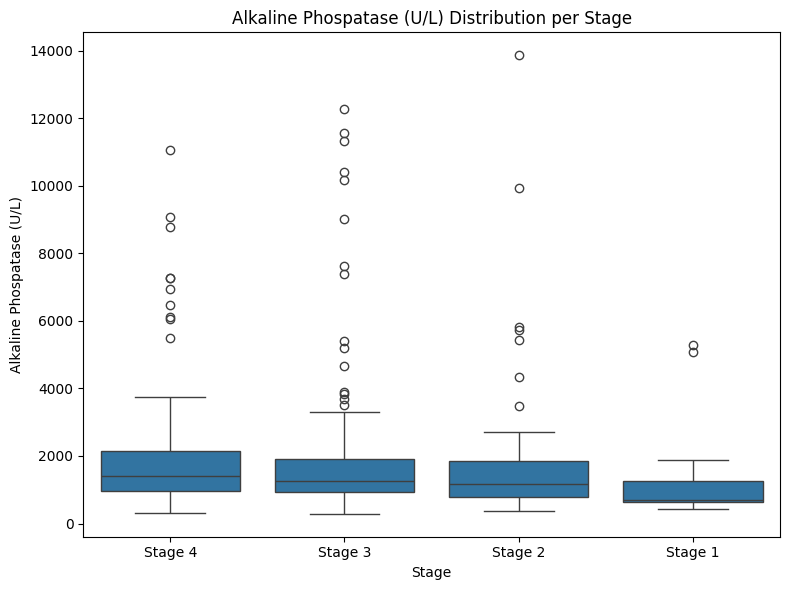

In [92]:
# Alkaline Phospatase (U/L) and Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='Alkaline Phospatase (U/L)', data=data)

plt.xlabel('Stage')
plt.ylabel('Alkaline Phospatase (U/L)')
plt.title('Alkaline Phospatase (U/L) Distribution per Stage')

plt.tight_layout()
plt.show()

This box plot shows the distribution of Alkaline Phosphatase (ALP) levels at each stage. Generally, the median ALP value appears slightly higher at Stage 4 compared to the other stages, while Stage 1 has the lowest median. The interquartile range (IQR) is relatively similar across each stage, but Stage 4 has a significantly higher number of outliers, indicating individuals with very high ALP levels. This pattern suggests that in the later stages of the disease, ALP levels tend to increase with greater variation, although most of the data remains within the normal range

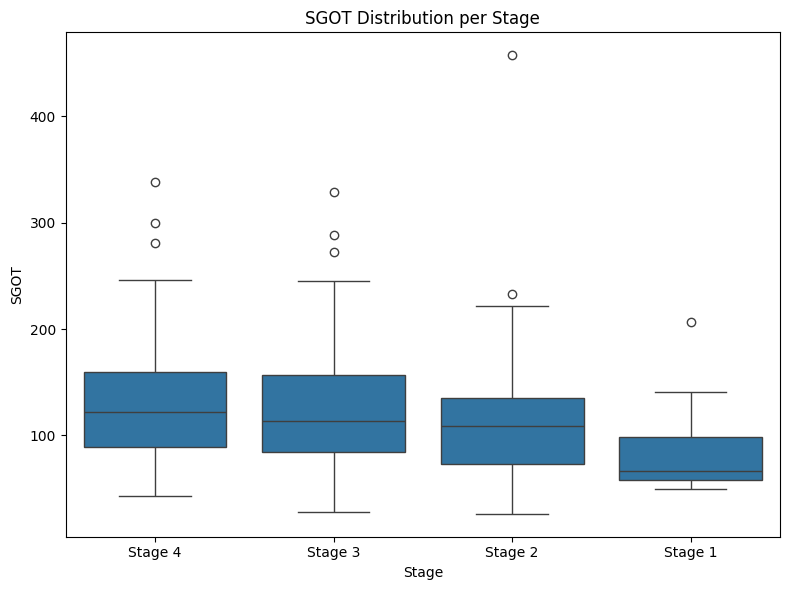

In [93]:
# SGOT and Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='SGOT', data=data)

plt.xlabel('Stage')
plt.ylabel('SGOT')
plt.title('SGOT Distribution per Stage')

plt.tight_layout()
plt.show()

This chart shows the distribution of SGOT levels at each stage. The median SGOT value is relatively stable across all stages, with a slight decrease at Stage 1. The interquartile range (IQR) is also similar across all stages, indicating a consistent distribution. However, Stage 4 has more outliers compared to the other stages, indicating individuals with very high SGOT levels. Overall, SGOT levels do not show significant changes as the disease stage progresses, although there are some individuals with much higher levels at the advanced stages

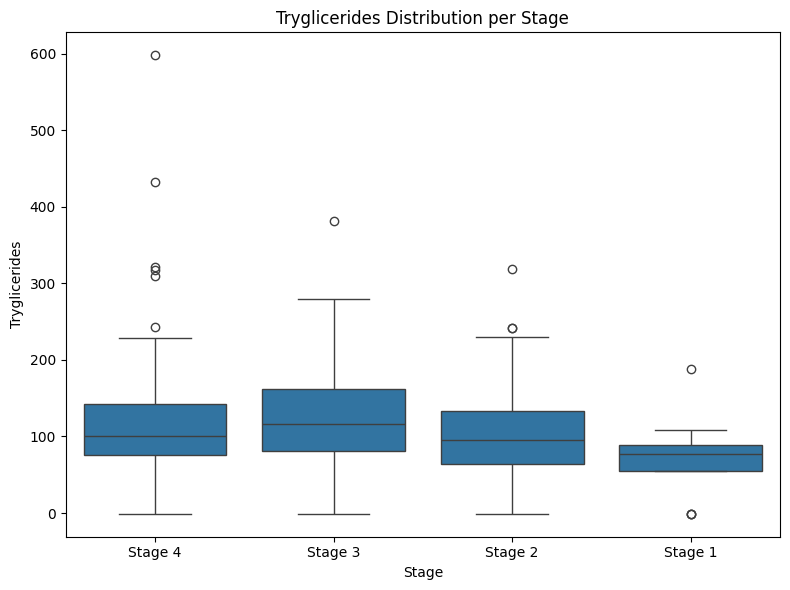

In [94]:
# Tryglicerides and Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='Tryglicerides', data=data)

plt.xlabel('Stage')
plt.ylabel('Tryglicerides')
plt.title('Tryglicerides Distribution per Stage')

plt.tight_layout()
plt.show()

This box plot shows the distribution of triglyceride levels at each stage. Overall, the median triglyceride levels appear relatively stable across all stages, with a slight decrease at Stage 1. The interquartile range (IQR) shows a fairly uniform distribution across all stages, but there are some outliers, particularly at Stage 4 and Stage 3, indicating individuals with very high triglyceride levels. This suggests that triglyceride levels do not change significantly as the disease progresses

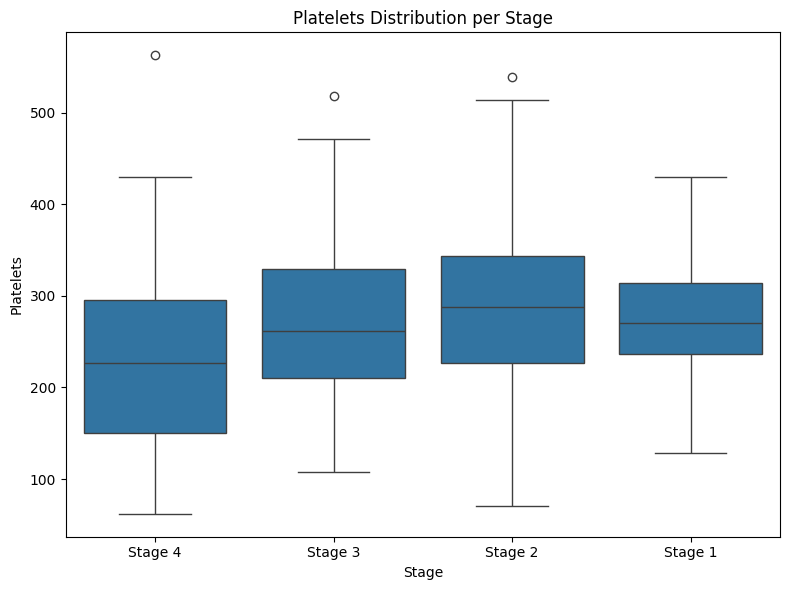

In [95]:
# Platelets and Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='Platelets', data=data)

plt.xlabel('Stage')
plt.ylabel('Platelets')
plt.title('Platelets Distribution per Stage')

plt.tight_layout()
plt.show()

This chart shows the distribution of platelet count at each disease stage. The median platelet count appears to slightly increase from Stage 4 to Stage 1, with a similar interquartile range (IQR) across all stages. Stage 4 has more outliers compared to the other stages, indicating individuals with very low platelet counts. Overall, platelet count tends to gradually increase as the severity of the disease decreases

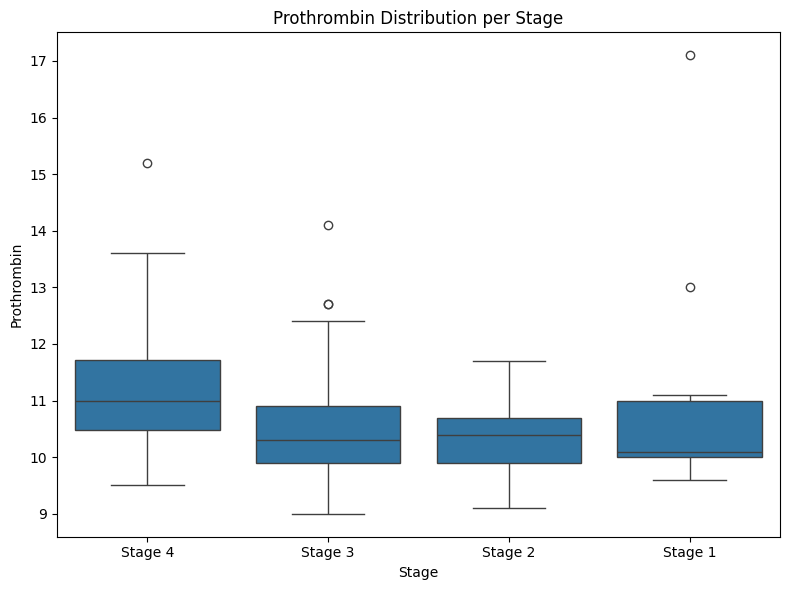

In [96]:
# Prothrombin and Stage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stage', y='Prothrombin', data=data)

plt.xlabel('Stage')
plt.ylabel('Prothrombin')
plt.title('Prothrombin Distribution per Stage')

plt.tight_layout()
plt.show()

This chart shows the distribution of prothrombin levels at each stage. The median prothrombin level appears to slightly increase from Stage 4 to Stage 1, with a consistent interquartile range (IQR) across all stages. Stage 4 has more outliers compared to the other stages, indicating individuals with very high prothrombin levels. This pattern suggests that prothrombin levels tend to gradually increase in the lighter stages of the disease

# Feature Engineering

In [97]:
# LabelEncoding
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()

data['Drug'] = label_encoding.fit_transform(data['Drug'])
data['Gender'] = label_encoding.fit_transform(data['Gender'])
data['Ascites'] = label_encoding.fit_transform(data['Ascites'])
data['Hepatomegaly'] = label_encoding.fit_transform(data['Hepatomegaly'])
data['Edema'] = label_encoding.fit_transform(data['Edema'])
data['Stage'] = label_encoding.fit_transform(data['Stage'])

In [98]:
# Display the first five rows of the dataset after encoding
data.head()

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,0,0,1,1,2,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3,58
1,0,0,0,1,0,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2,56
2,0,1,0,0,1,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3,70
3,0,0,0,1,1,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3,54
4,1,0,0,1,0,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2,38


# Data Splitting

In [99]:
# Splitting data
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

x = data.drop('Stage', axis=1)
y = data['Stage']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Distribusi kelas")
print(pd.Series(y).value_counts())
print("\nDistribusi kelas pada data latih:")
print(pd.Series(y_train).value_counts())
print("\nDistribusi kelas pada data uji:")
print(pd.Series(y_test).value_counts())

Distribusi kelas
Stage
2    118
3    108
1     65
0     15
Name: count, dtype: int64

Distribusi kelas pada data latih:
Stage
2    91
3    89
1    51
0    13
Name: count, dtype: int64

Distribusi kelas pada data uji:
Stage
2    27
3    19
1    14
0     2
Name: count, dtype: int64


After the data is split, the class distribution in both the training and testing datasets reflects a similar proportion to the overall dataset, where Stage 2 has the highest number of samples, followed by Stage 3, Stage 1, and Stage 0, which has the fewest samples. While this proportion is preserved, class imbalance remains an issue, especially in Stage 0, which is highly underrepresented, with only 13 samples in the training data and 2 samples in the testing data. This imbalance could affect model performance, so strategies such as oversampling, class weighting, or other methods are necessary to address this imbalance

# Oversampling

In [100]:
# Oversampling
from imblearn.over_sampling import SMOTE

# SMOTE Initialization
smote = SMOTE(random_state=42)

# Oversampling data train
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [101]:
# Display the class distribution after oversampling
print("Before Oversampling:")
print(y_train.value_counts())

print("\nAfter Oversampling:")
print(pd.Series(y_resampled).value_counts())

Before Oversampling:
Stage
2    91
3    89
1    51
0    13
Name: count, dtype: int64

After Oversampling:
Stage
2    91
1    91
3    91
0    91
Name: count, dtype: int64


Before oversampling, the class distribution shows a significant imbalance, with Stage 2 having the highest number of samples (91), followed by Stage 3 (89), Stage 1 (51), and Stage 0, which is highly underrepresented with only 13 samples. After oversampling, the distribution becomes balanced, with each stage having an equal number of samples, 91 for Stage 0, Stage 1, Stage 2, and Stage 3. This balancing of the dataset helps to address the class imbalance issue, ensuring that the model can learn from a more representative distribution of the classes, which can potentially improve the model's performance

# Scaling

In [102]:
# Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

x_resampled = scaler.fit_transform(x_resampled)
x_test = scaler.transform(x_test)

# Random Forest

In [103]:
# Import Libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [117]:
RF_class = RandomForestClassifier(criterion= 'gini', max_depth=3)
RF_class.fit(x_resampled, y_resampled)

RandomForestClassifier(max_depth=3)

In [118]:
# Make predictions
y_pred = RF_class.predict(x_test)
y_pred_prob = RF_class.predict_proba(x_test)[:, 1]

In [119]:
# Classification Report
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred))

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.47      0.57      0.52        14
           2       0.86      0.22      0.35        27
           3       0.52      0.89      0.65        19

    accuracy                           0.50        62
   macro avg       0.46      0.42      0.38        62
weighted avg       0.64      0.50      0.47        62



1. **Precision**: The highest precision is achieved by class 2 (0.86), indicating that the model is quite good at avoiding false positive predictions for this class. Class 3 also has a decent precision (0.52), while class 1 only has a precision of 0.47, and class 0 has a precision of 0.00 because there are no correct predictions for this class. This suggests that the model struggles to predict classes with fewer data, such as class 0.

2. **Recall**: The highest recall is found in class 3 (0.89), meaning the model successfully identifies most of the class 3 data correctly. On the other hand, recall for class 2 is only 0.22, indicating that the model fails to detect most of the data for this class. Recall for class 1 is 0.57, which is better than the other classes, while class 0 again has a recall of 0.00, showing that the model cannot recognize this class at all.

3. **F1-Score**: The highest F1-score is 0.65 for class 3, indicating the best balance between precision and recall for this class. Class 1 has an F1-score of 0.52, showing moderate performance, while class 2 only has 0.35, and class 0 again has an F1-score of 0.00 due to no correct predictions.

4. **Accuracy**: The model's accuracy is 50%, indicating that the model is only able to predict half of the test data correctly.

5. **Macro Average and Weighted Average**: The macro average precision (0.46), recall (0.42), and F1-score (0.38) show a low average performance across all classes. The weighted average precision (0.64), recall (0.50), and F1-score (0.47) are slightly better because they account for class distribution, but still indicate that the model is not very effective.

**Conclusion**: The model's performance is inconsistent across classes, with the best performance in class 3 and the worst in class 0. The overall accuracy of 50% suggests that the model needs improvement, particularly in handling class imbalance and predictions for the underrepresented class (class 0).

# Fine-Tuning Random Forest

In [123]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5, 8],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

grid_search_rf = GridSearchCV(rf_model,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=3,
    n_jobs=-1
)

grid_search_rf.fit(x_resampled, y_resampled)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\Users\Jeremy Djohar Riyadi\AppData\Local\Programs\Python\Python38\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 8],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro', verbose=3)

In [124]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 150}
Best Score: 0.6350024262301571


In [125]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(x_test)

print("\nBest RandomForestClassifier")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Best RandomForestClassifier
Confusion Matrix:
[[ 0  2  0  0]
 [ 2  5  3  4]
 [ 2  5 11  9]
 [ 0  1  2 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.38      0.36      0.37        14
           2       0.69      0.41      0.51        27
           3       0.55      0.84      0.67        19

    accuracy                           0.52        62
   macro avg       0.41      0.40      0.39        62
weighted avg       0.56      0.52      0.51        62



1. **Precision**: The highest precision is achieved by class 2 (0.69), followed by class 3 (0.55). The precision for class 1 is lower (0.38), and class 0 still has a precision of 0.00 because there are no correct predictions for this class. Although precision for classes 2 and 3 has improved compared to before, the precision for class 1 remains low, indicating that the model still struggles to predict the minority class.

2. **Recall**: The highest recall is found in class 3 (0.84), indicating that the model is able to correctly identify most of the data for this class. Recall for class 2 is 0.41, which is higher than before, while recall for class 1 is 0.36. Class 0 still has a recall of 0.00, meaning the model still cannot recognize this class at all.

3. **F1-Score**: The highest F1-score is 0.67 for class 3, indicating a good balance between precision and recall. Class 2 has an F1-score of 0.51, which also increased compared to before. However, the F1-score for class 1 (0.37) remains low, and class 0 still has an F1-score of 0.00 due to no correct predictions.

4. **Overall Accuracy**: The model's accuracy after fine-tuning is 52%, a slight increase from 50%, indicating a general improvement in performance.

5. **Macro Average and Weighted Average**: The macro average precision (0.41), recall (0.40), and F1-score (0.39) show that the average performance across all classes is still low. The weighted average precision (0.56), recall (0.52), and F1-score (0.51) show slight improvement compared to the previous model.

**Conclusion**: After fine-tuning, the model shows improved performance, especially for classes 2 and 3, with higher precision, recall, and F1-scores compared to before. However, class 0 is still not predicted at all, and performance on class 1 remains low. Overall, accuracy increased from 50% to 52%, but class imbalance remains a significant issue.

# XGB Model

In [120]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,          # Number of trees
    learning_rate=0.1,         # Learning rate
    max_depth=3,               # Maximum depth of a tree
    objective='binary:logistic',  # Objective for binary classification
    eval_metric='auc',         # Evaluation metric
    random_state=42            # Random seed for reproducibility
)

In [121]:
# Train the XGBoost model
xgb_model.fit(x_resampled, y_resampled)

# Make predictions
y_pred = xgb_model.predict(x_test)
y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]

In [122]:
# Classification Report
print("Classification Report XGBoost Model:\n", classification_report(y_test, y_pred))

Classification Report XGBoost Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.29      0.31        14
           2       0.55      0.41      0.47        27
           3       0.56      0.79      0.65        19

    accuracy                           0.48        62
   macro avg       0.36      0.37      0.36        62
weighted avg       0.49      0.48      0.47        62



1. **Precision**: The highest precision is achieved by class 3 (0.56), followed by class 2 (0.55). Precision for class 1 is lower (0.33), and class 0 has a precision of 0.00 because there are no correct predictions for this class. This indicates that the model performs better in avoiding false positive predictions for the majority class.

2. **Recall**: The highest recall is found in class 3 (0.79), meaning the model is able to correctly identify most of the data for this class. Recall for class 2 is 0.41, while recall for class 1 is only 0.29. Class 0 still has a recall of 0.00, indicating that the model is unable to recognize this class at all.

3. **F1-Score**: The highest F1-score is 0.65 for class 3, indicating a relatively good balance between precision and recall. Class 2 has an F1-score of 0.47, while class 1 has only 0.31. Class 0 still has an F1-score of 0.00 because there are no correct predictions.

4. **Overall Accuracy**: The model’s accuracy is 48%, indicating that the model is only able to correctly predict less than half of the test data.

5. **Macro Average and Weighted Average**: The macro average precision (0.36), recall (0.37), and F1-score (0.36) show that the average performance across all classes is still low. The weighted average precision (0.49), recall (0.48), and F1-score (0.47) show slightly better performance because they account for class distribution.

**Conclusion**: The XGBoost model, before fine-tuning, performs relatively well on the majority class, particularly class 3, with relatively high precision, recall, and F1-scores. However, the model performs poorly on the minority class, especially class 0, which is not predicted at all. Further improvements are needed to enhance performance across all classes.

# Fine-Tuning XGBoost Model

In [113]:
# Define the parameter grid for fine-tuning
param_grid = {
    'n_estimators': [100, 150],      
    'max_depth': [3, 5, 7],         
    'learning_rate': [0.05, 0.1],  
    'subsample': [0.8, 1.0],        
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1],                 
}

In [114]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro', 
    cv=3,               
    verbose=1,          
    n_jobs=-1            
)

In [115]:
grid_search.fit(x_resampled, y_resampled)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
Best F1-Score: 0.6123438823163311


In [116]:
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(x_test)

print("\nBest XGBClassifier")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))


Best XGBClassifier
Confusion Matrix:
[[ 0  0  1  1]
 [ 2  4  2  6]
 [ 0  3 13 11]
 [ 1  0  3 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.57      0.29      0.38        14
           2       0.68      0.48      0.57        27
           3       0.45      0.79      0.58        19

    accuracy                           0.52        62
   macro avg       0.43      0.39      0.38        62
weighted avg       0.57      0.52      0.51        62



1. **Precision**: After fine-tuning, the highest precision is still for class 2 (0.68), a slight improvement from the previous 0.55. Precision for class 3 decreased from 0.56 to 0.45, while class 1 improved from 0.33 to 0.57. Precision for class 0 remains 0.00 as there are no correct predictions for this class. Fine-tuning has a positive impact on classes 1 and 2, but the performance for class 3 slightly declined.

2. **Recall**: The highest recall remains for class 3, but it increased from 0.79 to 0.79. Recall for class 2 increased from 0.41 to 0.48, showing that the model is better able to identify data for this class. Recall for class 1 remained the same at 0.29, while recall for class 0 remains 0.00.

3. **F1-Score**: F1-score for class 2 increased from 0.47 to 0.57, and for class 1, it increased from 0.31 to 0.38. The F1-score for class 3 remained stable around 0.58, while for class 0, it stayed at 0.00. This indicates that fine-tuning improved the balance between precision and recall for classes 1 and 2.

4. **Overall Accuracy**: The accuracy after fine-tuning increased from 48% to 52%, indicating an improvement in overall performance.

5. **Macro Average and Weighted Average**: Macro average precision increased from 0.36 to 0.43, recall slightly decreased from 0.37 to 0.39, and F1-score increased from 0.36 to 0.38. Weighted average precision increased from 0.49 to 0.57, recall from 0.48 to 0.52, and F1-score from 0.47 to 0.51. These improvements reflect the positive impact of fine-tuning on model performance.

**Conclusion**: Fine-tuning the XGBoost model has a positive impact on overall performance, especially for classes 1 and 2, with improvements in precision, recall, and F1-score. The model's accuracy also increased from 48% to 52%. However, performance for class 0 remains very poor, with precision, recall, and F1-score still at 0.00. The comparison shows that fine-tuning successfully improved predictions for some classes, but the model still requires further improvements, especially in handling class imbalance.

# Best Model

After fine-tuning both models, Random Forest and XGBoost, we can compare their performance using several relevant evaluation metrics, such as Accuracy, Precision, Recall, and F1-Score.

**Random Forest After Fine-Tuning** shows an accuracy of 52%, meaning the model is able to correctly predict slightly more than half of the test data. The precision for class 2 is very high (0.86), indicating that the model is very good at avoiding false positives for this class. However, the precision for class 0 remains 0.00, which means the model fails to identify this class altogether. The recall for class 3 is 0.89, which is very high, showing that the model is very good at recognizing this class. However, the recall for class 2 is very low (0.22), meaning the model is not effective at recognizing data from class 2. The F1-Score for class 3 is the best (0.65), showing a good balance between precision and recall.

**XGBoost After Fine-Tuning** also shows an accuracy of 52%, the same as Random Forest. The precision for class 2 (0.68) and class 1 (0.57) is better than Random Forest, while precision for class 3 decreased to 0.45. The recall for class 3 is 0.79, which is excellent, but recall for class 1 and class 2 remains low (0.29 and 0.48, respectively). The F1-Score for class 2 (0.57) and class 3 (0.58) is better than Random Forest, but class 1 (0.38) and class 0 (0.00) show poor performance.

**Comparison** between the two models shows that although both have the same accuracy, XGBoost performs better in precision for classes 1 and 2 compared to Random Forest, suggesting that XGBoost is better at avoiding false positives for these classes. However, the precision for class 0 remains 0.00 in both models. In terms of recall, Random Forest has a higher recall for class 3 (0.89) compared to XGBoost (0.79), which shows that Random Forest is better at recognizing class 3. However, recall for class 2 is still higher in XGBoost (0.48) compared to Random Forest (0.22). The F1-Score for class 3 is higher in Random Forest (0.65) compared to XGBoost (0.58), but the F1-Score for class 2 is higher in XGBoost (0.57) compared to Random Forest (0.35).

Overall, despite both models having the same accuracy, XGBoost after fine-tuning can be considered the better model due to its higher precision for classes 1 and 2, and higher F1-Score for class 2. However, Random Forest performs better in recognizing class 3, with higher recall and F1-Score. If performance on the majority class (class 3) is prioritized, Random Forest may be a better choice. However, in the context of a more balanced model across classes, XGBoost provides better performance for harder-to-recognize classes (classes 1 and 2), making it superior overall.

# Feature Importance

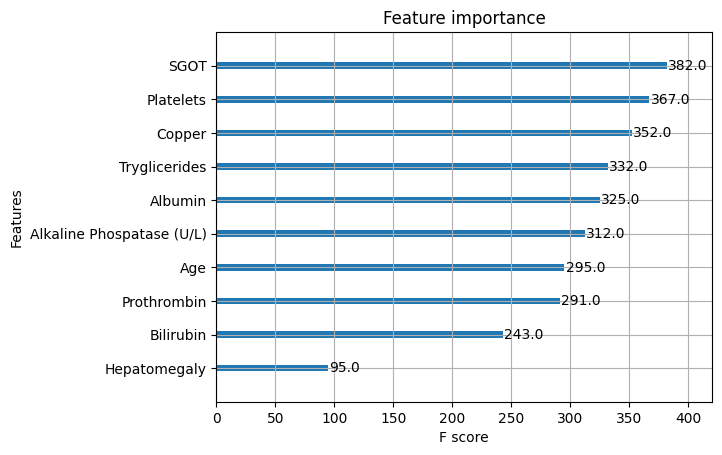

In [ ]:
# Model XGBoost
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Plotting feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.show()

The chart above shows that the features SGOT, Platelets, and Copper have the highest F-scores (382.0, 367.0, and 352.0, respectively), making them the most important features in predicting the target variable due to their significant contribution to the model's performance. Features like Triglycerides, Albumin, and Alkaline Phosphatase are also important, though their contributions are slightly lower, with F-scores ranging from 312 to 332. Features such as Bilirubin and especially Hepatomegaly (F-score of 95.0) have a smaller influence, and could potentially be considered for removal if model simplification or dimensionality reduction is needed. The importance of these features is determined by how much they help improve the model's prediction accuracy, as measured by the F-score, with higher values indicating greater relevance